# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


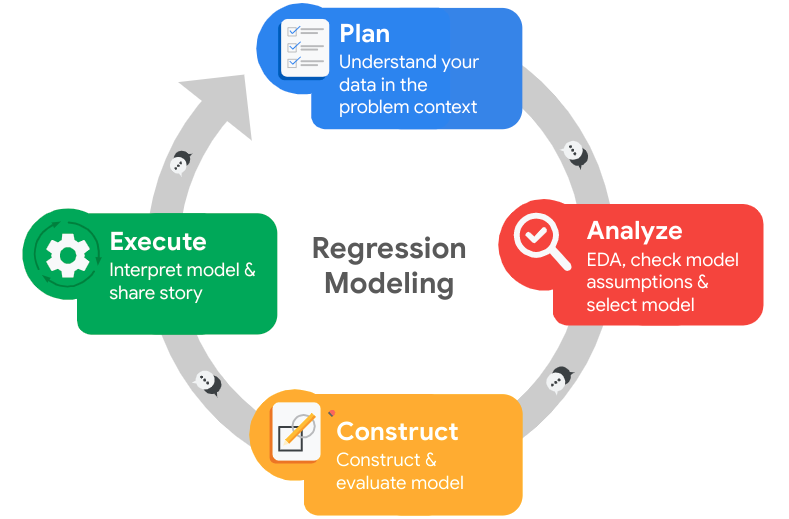

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

-  Who are your stakeholders for this project?
    
    The stakeholders for this project are the members of the Salifort Motors HR Department
- What are you trying to solve or accomplish?

    The goal is create a model for employee retention/loss
- What are your initial observations when you explore the data?

    There are a few departments and salary levels. The satisfaction and evalution scores are already scaled. There are some outliers in years served, but everything else seems okay on that front.
- Do you have any ethical considerations in this stage?

    There aren't any ethical considerations at this point.




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [56]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Import modeling
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [57]:
# Load dataset into a dataframe
df0 = pd.read_csv("./Data/HR_comma_sep.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [58]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [59]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [60]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [61]:
# Rename columns as needed
df0.rename(columns={'average_montly_hours': 'average_monthly_hours', 'time_spend_company': 'yrs_at_company',
                    'Work_accident': 'work_accident', 'Department': 'department', 'number_project': 'number_projects'}, inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'yrs_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [62]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
yrs_at_company           0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [63]:
# Check for duplicates
df0.duplicated().sum()

3008

In [64]:
# Inspect some rows containing duplicates as needed
duplicated_rows = df0.loc[df0.duplicated() == True]
duplicated_rows.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,yrs_at_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [65]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_unique = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df_unique.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,yrs_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<Axes: ylabel='yrs_at_company'>

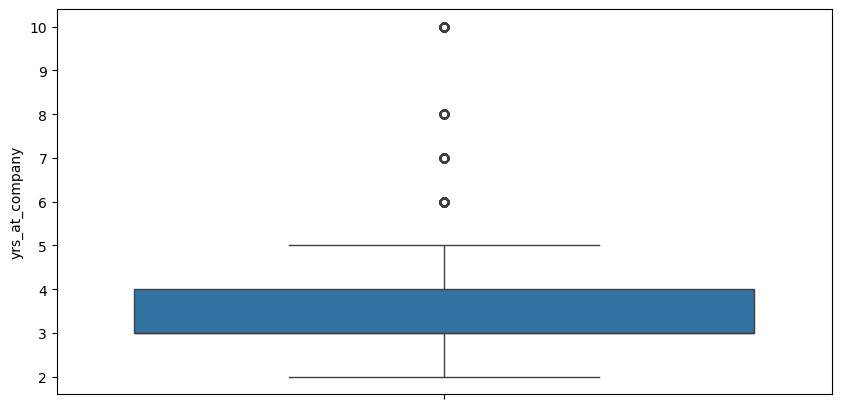

In [66]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df_unique['yrs_at_company'])

<Axes: ylabel='number_projects'>

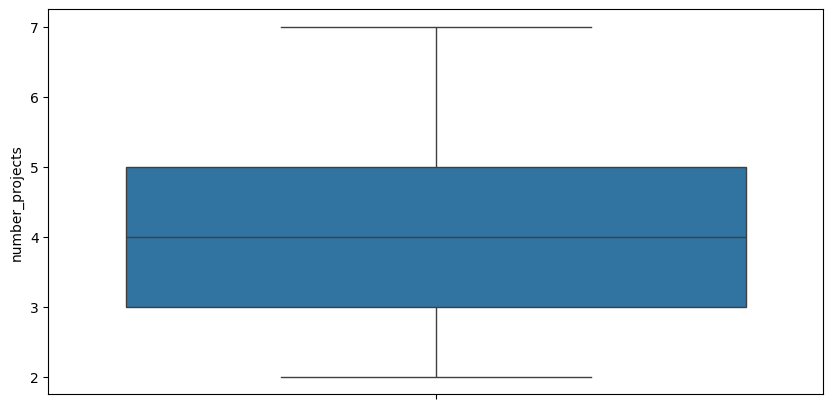

In [67]:
# Boxplot for number of projects
plt.figure(figsize=(10,5))
sns.boxplot(data=df_unique['number_projects'])

<Axes: ylabel='average_monthly_hours'>

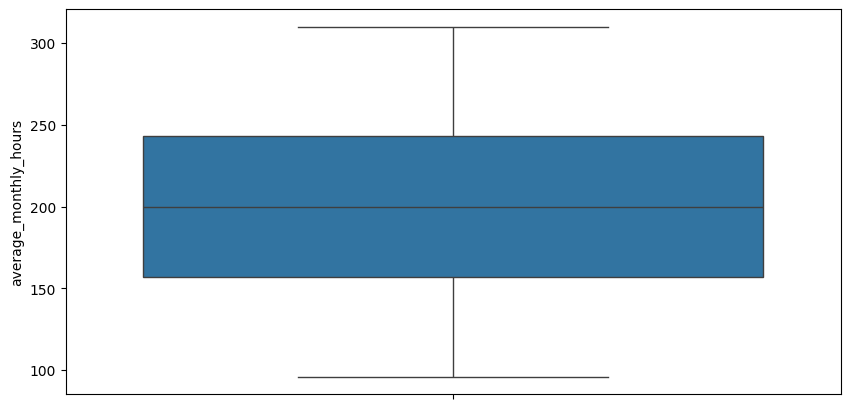

In [68]:
# Boxplot for average monthly hours
plt.figure(figsize=(10,5))
sns.boxplot(data=df_unique['average_monthly_hours'])

<Axes: >

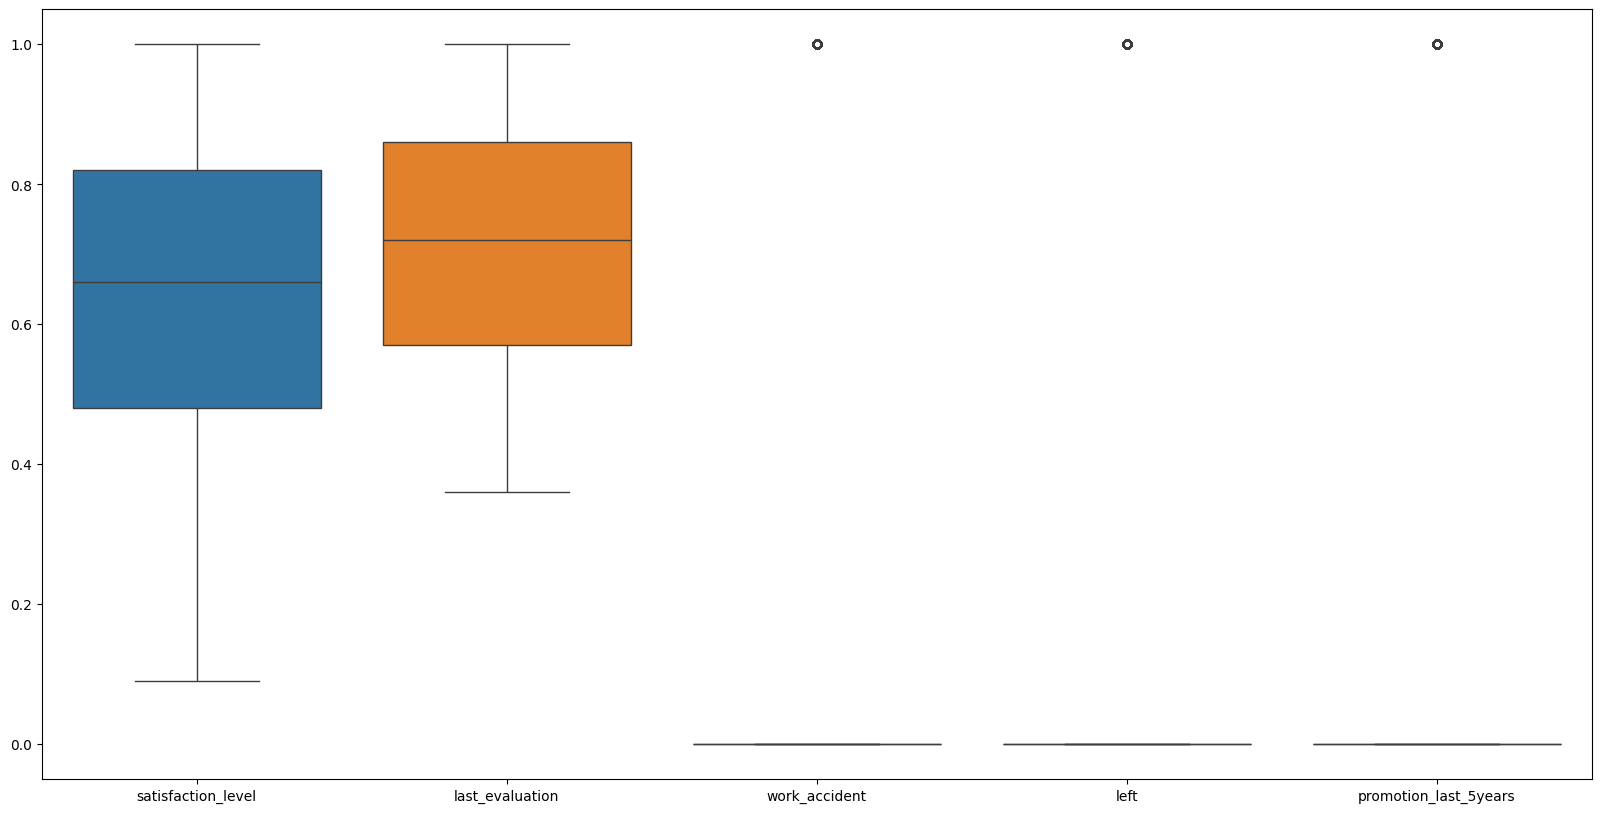

In [69]:
# Boxplot for satisfaction_level, last_evaluation, work_accident, left, promotion_last_5years
plt.figure(figsize=(20,10))
sns.boxplot(data=df_unique[['satisfaction_level','last_evaluation','work_accident','left', 'promotion_last_5years']])

There are outliers in the following columns: yrs_at_company, work_accident, left, promotion_last_5years. However, for work_accident, left, promotion_last_5years, it appears that instead of being outliers, they simply have a small number of values that are 1, since there are only 2 values in each of these columns.

In [70]:
df_unique['work_accident'].value_counts()

work_accident
0    10141
1     1850
Name: count, dtype: int64

In [71]:
df_unique['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [72]:
df_unique['promotion_last_5years'].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

In [73]:
# Determine the number of rows containing outliers
df_unique.loc[df_unique['yrs_at_company'] > 5]

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,yrs_at_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [74]:
# Isolate the outliers
df_outliers = df_unique.loc[df_unique['yrs_at_company'] > 5]
df_outliers

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,yrs_at_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [75]:
df_outliers['left'].value_counts(normalize=True)

left
0    0.867718
1    0.132282
Name: proportion, dtype: float64

Of the tenure outliers, there is a 86.7% - 13.3% ratio of retained to lost workers.

In [76]:
df_unique['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

In [77]:
df_not_outliers = df_unique.loc[df_unique['yrs_at_company'] <= 5]
df_not_outliers

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,yrs_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,sales,medium
11986,0.48,0.50,5,142,4,0,0,0,IT,medium
11987,0.19,0.79,4,229,4,0,0,0,product_mng,medium
11992,0.62,0.85,3,237,3,1,0,0,IT,medium


In [78]:
df_not_outliers['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

Because the number of outliers is small and has a pretty similar ratio of retained/lost, we will remove them from the dataset to be safe in making a general model. Removing them shouldn't impact our model much, and it's already a bit obvious that outlier long tenured employees are less likely to churn. Maybe it would be worth exploring models for different buckets based on years employed, to get a better insight on longer tenured employees vs shorter.

In [79]:
# Set our final trimmed dataframe
df = df_not_outliers

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


- What did you observe about the relationships between variables?

    The variables were generally in a standard range, and none of the variables were highly correlated with eachother.
- What do you observe about the distributions in the data?

    The distributions were general normal.
- What transformations did you make with your data? Why did you chose to make those decisions?

    I chose to remove outliers from the data. It's clear that longer tenured employees are staying with the company, and we don't want their data to skew the results for the more general case.
- What are some purposes of EDA before constructing a predictive model?

    To look for outliers, inconsistencies, or patterns that might give some insights or throw any red flags before we start creating a model.
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

    There were no ethical considerations at this stage

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [80]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True))

left
0    9285
1    1882
Name: count, dtype: int64
left
0    0.831468
1    0.168532
Name: proportion, dtype: float64


Looks like a split of 83.1% to 16.9%

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11167 non-null  float64
 1   last_evaluation        11167 non-null  float64
 2   number_projects        11167 non-null  int64  
 3   average_monthly_hours  11167 non-null  int64  
 4   yrs_at_company         11167 non-null  int64  
 5   work_accident          11167 non-null  int64  
 6   left                   11167 non-null  int64  
 7   promotion_last_5years  11167 non-null  int64  
 8   department             11167 non-null  object 
 9   salary                 11167 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 959.7+ KB


### Data visualizations

Doesn't look like there is any clear direct relationships to the 'left' field

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

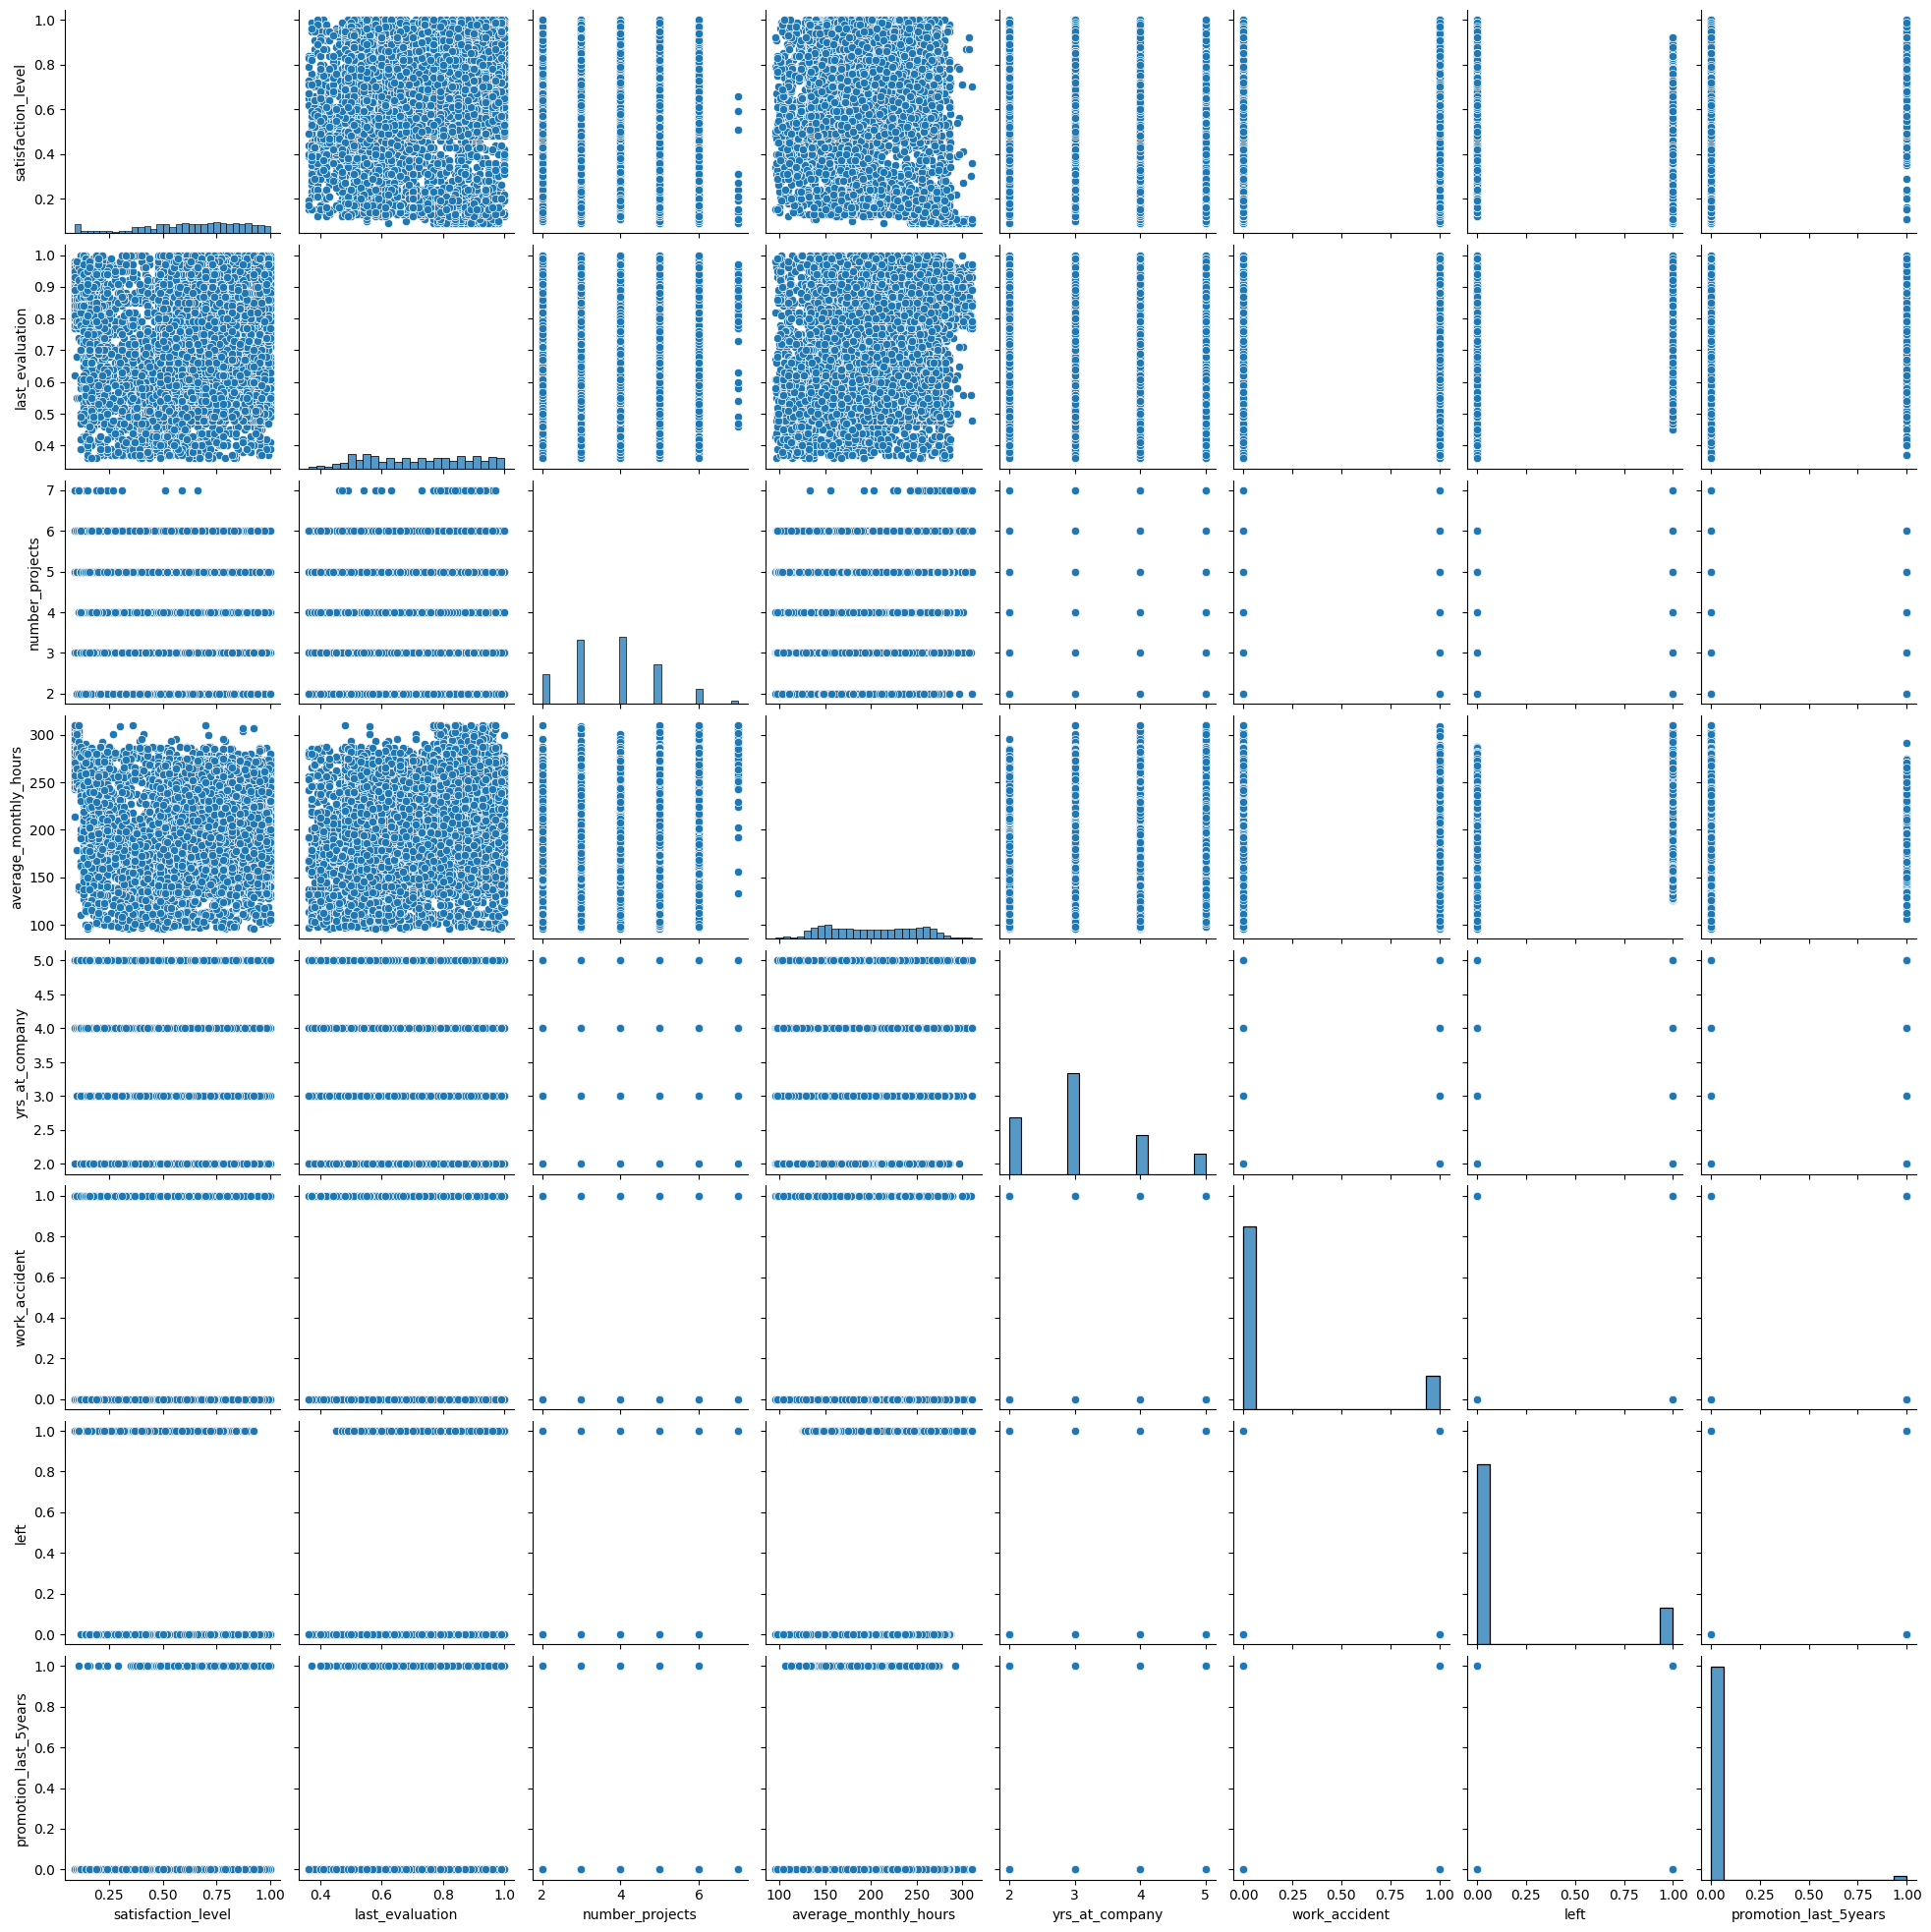

In [82]:
# Create a plot as needed
sns.pairplot(df)

<Axes: >

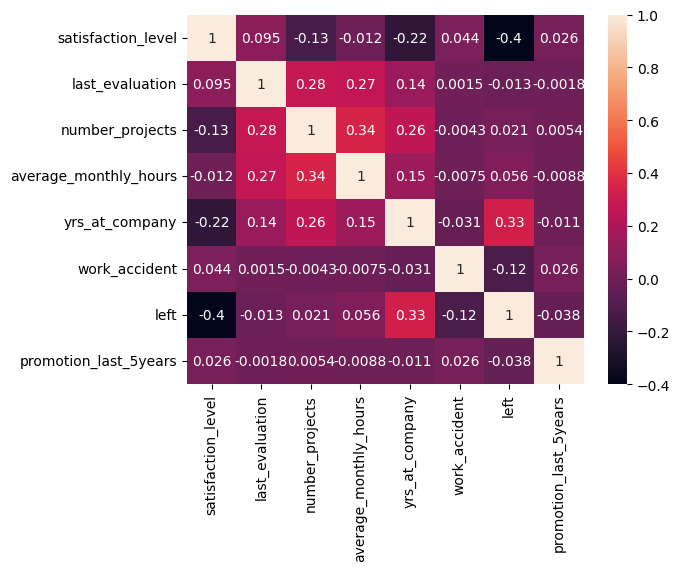

In [83]:
# Create a plot as needed
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

It looks like satisfaction_level is the most (negatively) correlated with leaving. Which makes sense.

<Axes: >

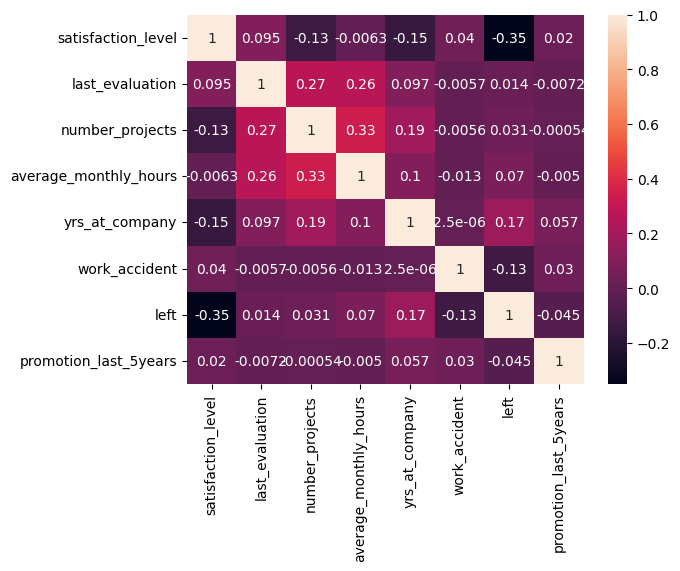

In [84]:
#using the original df with the outliers for years included
sns.heatmap(df_unique.select_dtypes(include=np.number).corr(), annot=True)

The one gives a lower correlation for yrs_at_company, but other columns look similar.

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Using all the available variable led to both the random forest and xgboost models fitting the data with great accuracy and precision. Maybe there are some feature engineering possibilities, but it seems like we already have a good model. There are no ethical considerations at this stage.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a classification task. Trying to predict an employee will leave or not.

### Identify the types of models most appropriate for this task.

I'm going to do both Random Forest and XGBoost. I may try logistic regression and Naive Bayes as well and compare all three.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [85]:
### YOUR CODE HERE ###
df2 = pd.get_dummies(df, drop_first=True)
df2.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,yrs_at_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
5,0.41,0.50,2,153,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [86]:
# Split X and y
y = df2['left']

X = df2.copy()
X = X.drop('left', axis=1)

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8375, 18)
(2792, 18)
(8375,)
(2792,)


In [88]:
%%time

# Do the random forest
rf = RandomForestClassifier(random_state=40)

cv_params = {'max_depth':[2,4,6,None],
             'min_samples_leaf':[1,2,3],
             'min_samples_split':[2,3,4],
             'max_features':[2,3,4],
             'n_estimators':[75,100,125]}

scoring_list = ['accuracy', 'precision', 'recall', 'f1']

rf_gs = GridSearchCV(rf, cv_params, scoring=scoring_list, cv=5, refit='f1')

### Open or fit/save a grid search

#with open(path+'rf_gs_model.pickle', 'rb') as to_read:
#    rf_gs = pickle.load(to_read)

rf_gs.fit(X_train, y_train)

path = './'

with open(path+'rf_gs_model.pickle', 'wb') as to_write:
    pickle.dump(rf_gs, to_write)

c:\Users\rsvag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rsvag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rsvag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rsvag\AppData\Local

CPU times: total: 8min 11s
Wall time: 16min 33s


In [89]:
rf_gs.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 125}

In [90]:
rf_gs.best_score_

0.9442731861474215

In [91]:
def make_results_table(model_name, model_object):

    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]

    table = pd.DataFrame({'Model':[model_name],
                          'Accuracy':[best_estimator_results.mean_test_accuracy],
                          'Precision':[best_estimator_results.mean_test_precision],
                          'F1':[best_estimator_results.mean_test_f1],
                          'Recall':[best_estimator_results.mean_test_recall]
                          })

    return table

In [92]:
rf_gs_results = make_results_table('Random Forest GS', rf_gs)
rf_gs_results

,Model,Accuracy,Precision,F1,Recall
0,Random Forest GS,0.98197,0.983106,0.944273,0.908556


In [93]:
# Do an XGBoost
xgb = XGBClassifier(objective='binary:logistic', random_state=40)

cv_xgb_params = {
             'max_depth':[2,4,6,None],
             'min_child_weight':[1,2,3,4,5],
             'learning_rate':[0.1,0.2,0.3],
             'n_estimators':[75,100,125]
}

xgb_gs = GridSearchCV(xgb, cv_xgb_params, scoring=scoring_list, cv=5, refit='f1')

### Open or fit/save a grid search

#with open(path+'xgb_gs_model.pickle', 'rb') as to_read:
#    xgb_gs = pickle.load(to_read)

xgb_gs.fit(X_train, y_train)

path = './'

with open(path+'xgb_gs_model.pickle', 'wb') as to_write:
    pickle.dump(xgb_gs, to_write)

In [94]:
xgb_gs_results = make_results_table('XGBoost GS', xgb_gs)
xgb_gs_results

,Model,Accuracy,Precision,F1,Recall
0,XGBoost GS,0.98209,0.981841,0.944735,0.910681


In [95]:
both_results = pd.concat([rf_gs_results,xgb_gs_results])
both_results

,Model,Accuracy,Precision,F1,Recall
0,Random Forest GS,0.98197,0.983106,0.944273,0.908556
0,XGBoost GS,0.98209,0.981841,0.944735,0.910681


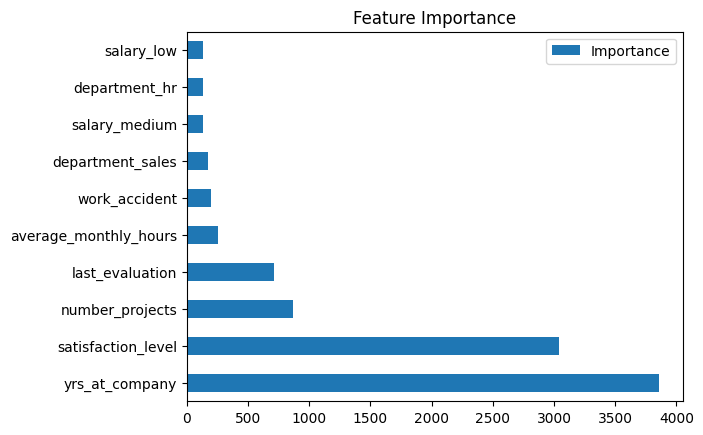

In [96]:
# Show the feature importances
feature_imp = pd.DataFrame(data=xgb_gs.best_estimator_.feature_importances_, index=xgb_gs.best_estimator_.feature_names_in_)
feature_imp.columns=['Importance']

feature_imp['Importance'] = feature_imp['Importance']*10000
feature_imp

feature_imp.nlargest(10, 'Importance').plot(kind='barh', title='Feature Importance')
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The most important feature from the XGBoost results was the satisfaction level, which is expected. However, the following features were ranked highly as well: Number of Projects, Years at Company, Average Monthly Hours, and their Last Evaluation.

Employees who were more likely to stay had fewer projects and hours worked. This suggests that perhaps employees that are leaving are overworked. However, it should be noted that satisfaction level was by far the most important variable, and figuring out ways to improve the satisfaction level could boost retention.

I would consider looking at which variables impact satisfaction level and try to tune those inputs.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Both of the models created predicted which employees would leave very well.

In [97]:
both_results

,Model,Accuracy,Precision,F1,Recall
0,Random Forest GS,0.98197,0.983106,0.944273,0.908556
0,XGBoost GS,0.98209,0.981841,0.944735,0.910681


### Conclusion, Recommendations, Next Steps

The most important feature from the XGBoost results was the satisfaction level, which is expected. However, the following features were ranked highly as well: Number of Projects, Years at Company, Average Monthly Hours, and their Last Evaluation.

Employees who were more likely to stay had fewer projects and hours worked. This suggests that perhaps employees that are leaving are overworked. However, it should be noted that satisfaction level was by far the most important variable, and figuring out ways to improve the satisfaction level could boost retention.

I would consider looking at which variables impact satisfaction level and try to tune those inputs.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.